### Libraries:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Problem Statement:



<a class="anchor" id="about_dataset"></a>

<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:210%;"> Details about the dataset </font><br>
    
**What is Autism:**
    

Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.

<br>
    
**Causes and Challenges:**
    
It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged.
Research has made clear that high quality early intervention can improve learning, communication and social skills, as well as underlying brain development. Yet the diagnostic process can take several years.

**The Role of Machine Learning:**
    
This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.


### Exploratory Data Analysis and Feature Selection:

In [5]:
df=pd.read_csv("Toddler Autism dataset July 2018.csv")
df.columns  #checking the columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Qchat Score', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD'],
      dtype='object')

In [6]:
df.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat Score
A1,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064
A2,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424
A3,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885
A4,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890
A5,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518
A6,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377
A7,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053
A8,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229
A9,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638
A10,0.130966,0.157498,0.003848,0.016872,0.045347,0.072162,0.175114,0.082004,0.028710,1.000000,-0.013021,0.290145


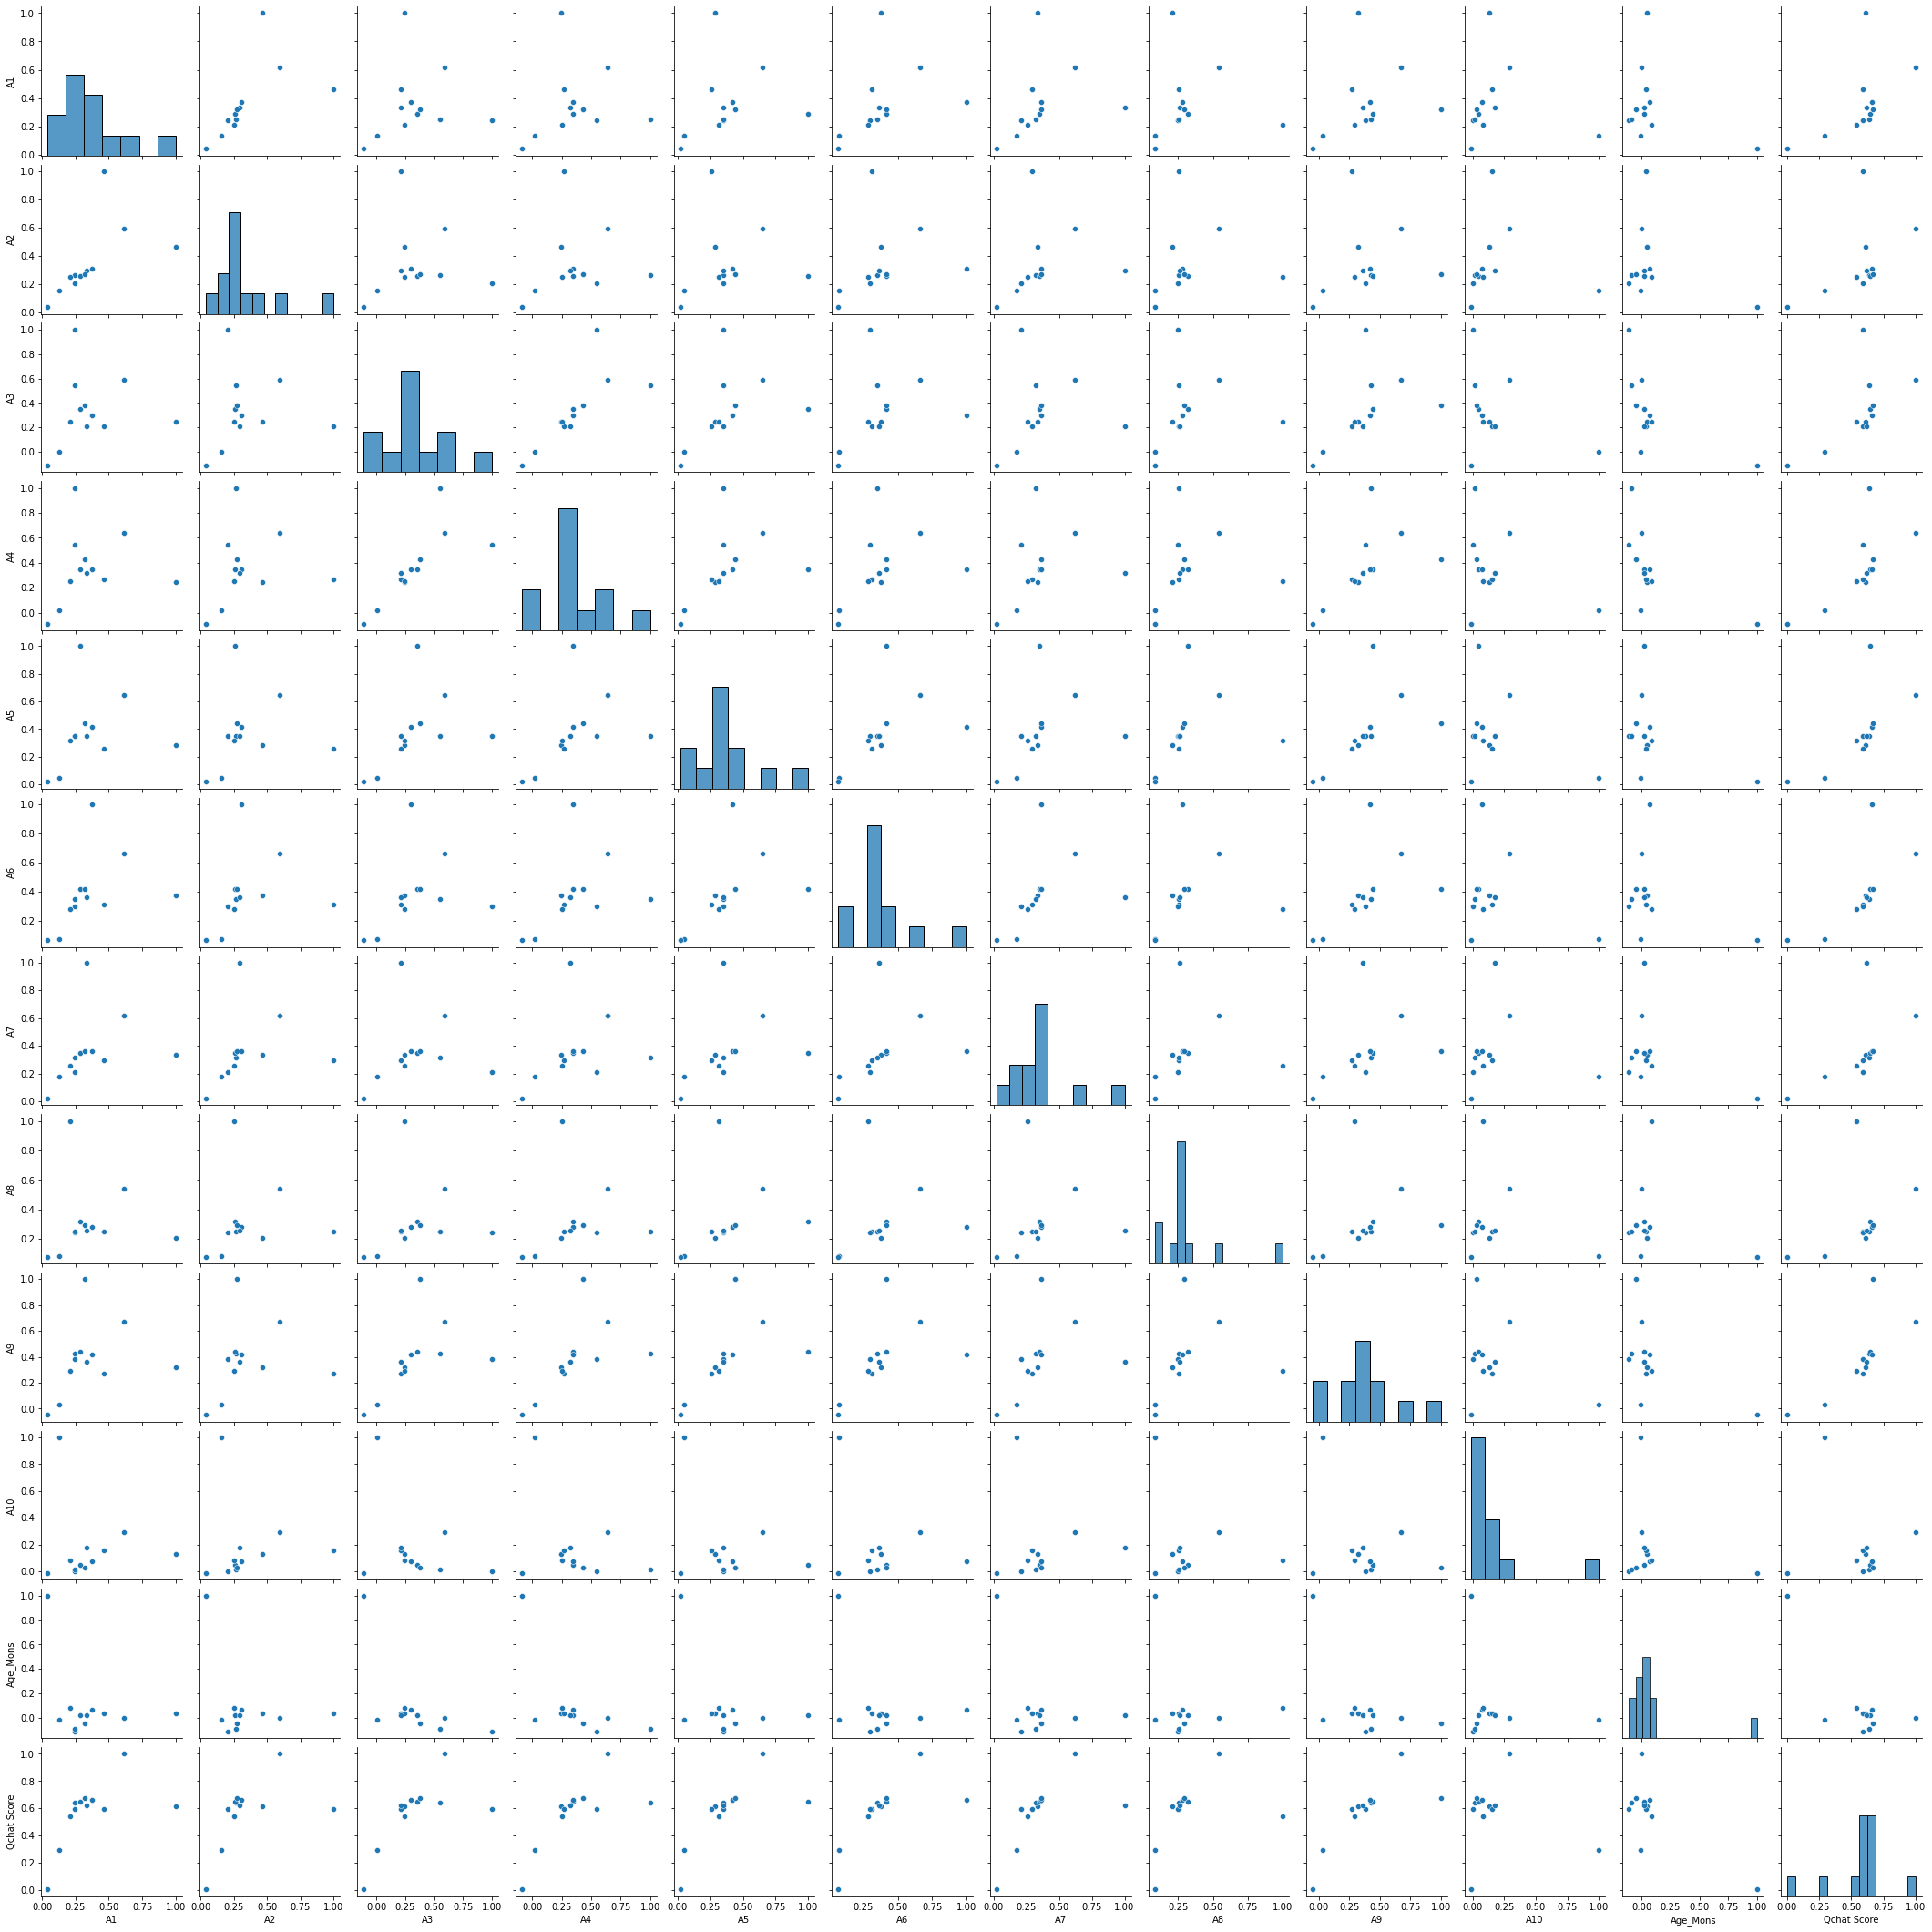

In [7]:
sns.pairplot(df.corr())

In [8]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Qchat Score', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD'],
      dtype='object')

In [9]:
df.rename({"Sex":"gender","Jaundice":"jaundice"},axis=1,inplace=True)

<AxesSubplot:>

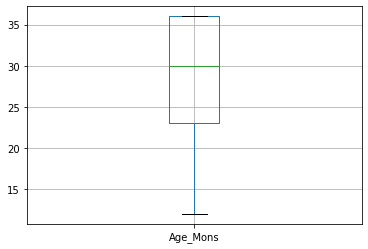

In [10]:
df[["Age_Mons","gender","jaundice","Family_mem_with_ASD"]].boxplot()

In [11]:
df["Age_Mons"].max() #outlier detected, now we will replace the outlier with mean value

36

In [12]:
mean=round(df["Age_Mons"].mean())
mean

28

In [13]:
#checking for the missing values
df.isna().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
gender                 0
Qchat Score            0
jaundice               0
Family_mem_with_ASD    0
Class/ASD              0
dtype: int64

In [14]:
df.isna().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
gender                 0
Qchat Score            0
jaundice               0
Family_mem_with_ASD    0
Class/ASD              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  gender               1054 non-null   object
 12  Qchat Score          1054 non-null   int64 
 13  jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
 15  Class/ASD            1054 non-null   object
dtypes: int

In [16]:
df["gender"].value_counts()

m    735
f    319
Name: gender, dtype: int64

In [17]:
df["gender"].replace({"m":1,"f":0},inplace=True)

In [18]:
df["jaundice"].replace({"yes":1,"no":0},inplace=True)

In [19]:
df["Family_mem_with_ASD"].replace({"yes":1,"no":0},inplace=True)

In [20]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,gender,Qchat Score,jaundice,Family_mem_with_ASD,Class/ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,3,1,0,No
1,1,1,0,0,0,1,1,0,0,0,36,1,4,1,0,Yes
2,1,0,0,0,0,0,1,1,0,1,36,1,4,1,0,Yes
3,1,1,1,1,1,1,1,1,1,1,24,1,10,0,0,Yes
4,1,1,0,1,1,1,1,1,1,1,20,0,9,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,1,0,1,No
1050,0,0,1,1,1,0,1,0,1,0,12,1,5,1,0,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,1,9,1,0,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,1,3,0,1,No


In [21]:
df["Class/ASD"].replace({"YES":1,"NO":0,"yes":1,"no":0,"Yes":1,"No":0},inplace=True)

In [22]:
df["Class/ASD"].unique()

array([0, 1], dtype=int64)

In [23]:
df.drop("Qchat Score",axis=1,inplace=True)

In [25]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,gender,jaundice,Family_mem_with_ASD,Class/ASD
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,0.697343,0.273245,0.161290,0.690702
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,0.459626,0.445837,0.367973,0.462424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  gender               1054 non-null   int64
 12  jaundice             1054 non-null   int64
 13  Family_mem_with_ASD  1054 non-null   int64
 14  Class/ASD            1054 non-null   int64
dtypes: int64(15)
memory usage: 123.6 KB


### Model  Selection and Model Training:

In [27]:
x=df.drop("Class/ASD",axis=1)
y=df["Class/ASD"]

In [28]:
x

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,gender,jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,1
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,0
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,0
1052,1,0,0,0,0,0,0,1,0,1,19,1,0,1


In [29]:
y

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class/ASD, Length: 1054, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

model4=RandomForestClassifier()
model4.fit(x_train,y_train)

model5=GaussianNB()
model5.fit(x_train,y_train)

model6=SVC()
model6.fit(x_train,y_train)

model7=AdaBoostClassifier()
model7.fit(x_train,y_train)

AdaBoostClassifier()

### Model Evaluation on training dataset:

In [32]:
y_pred_model1=model1.predict(x_train)

print("Accuracy of Logistic regression model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model1))
print("Classification report of logistic regression model on training data: \n",classification_report(y_train,y_pred_model1))

y_pred_model2=model2.predict(x_train)

print("Accuracy of KNN classifier model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model2))
print("Classification report of KNN classifier model on training data: \n",classification_report(y_train,y_pred_model2))

y_pred_model3=model3.predict(x_train)
print("Accuracy of Decision Tree model on training data: \n",accuracy_score(y_train,y_pred_model3))
print("classification report of Decision tree model on training data: \n",classification_report(y_train,y_pred_model3))


y_pred_model4=model4.predict(x_train)

print("Accuracy of Random forest model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model4))
print("Classification report of Random forest model on training data: \n",classification_report(y_train,y_pred_model4))
      
    
y_pred_model5=model5.predict(x_train)

print("Accuracy of GaussianNB model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model5))
print("Classification report of GaussianNB model on training data: \n",classification_report(y_train,y_pred_model5))

y_pred_model6=model6.predict(x_train)
print("Accuracy of SVC model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model5))
print("Classification report of SVC model on training data: \n",classification_report(y_train,y_pred_model5))

y_pred_model7=model7.predict(x_train)
print("Accuracy of Adaboost model on training data: \n",accuracy_score(y_true=y_train,y_pred=y_pred_model5))
print("Classification report of Adaboost model on training data: \n",classification_report(y_train,y_pred_model5))



Accuracy of Logistic regression model on training data: 
 1.0
Classification report of logistic regression model on training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       582

    accuracy                           1.00       843
   macro avg       1.00      1.00      1.00       843
weighted avg       1.00      1.00      1.00       843

Accuracy of KNN classifier model on training data: 
 0.9620403321470937
Classification report of KNN classifier model on training data: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       261
           1       0.99      0.96      0.97       582

    accuracy                           0.96       843
   macro avg       0.95      0.97      0.96       843
weighted avg       0.96      0.96      0.96       843

Accuracy of Decision Tree model on training data: 
 1.0
classification repo

### Model Evaluation on testing dataset:

In [33]:
y_pred_model1=model1.predict(x_test)

print("Accurac|y of Logistic regression model on testing data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model1))
print("Classification report of logistic regression model on testing data: \n",classification_report(y_test,y_pred_model1))

y_pred_model2=model2.predict(x_test)

print("Accuracy of KNN classifier model on testing data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model2))
print("Classification report of KNN classifier model on testing data: \n",classification_report(y_test,y_pred_model2))

y_pred_model3=model3.predict(x_test)
print("Accuracy of Decision Tree model on testing data: \n",accuracy_score(y_test,y_pred_model3))
print("classification report of Decision tree model on testing data: \n",classification_report(y_test,y_pred_model3))


y_pred_model4=model4.predict(x_test)

print("Accuracy of Random forest model on testing data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model4))
print("Classification report of Random forest model on testing data: \n",classification_report(y_test,y_pred_model4))
      
    
y_pred_model5=model5.predict(x_test)

print("Accuracy of GaussianNB model on testing data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model5))
print("Classification report of GaussianNB model on testing data: \n",classification_report(y_test,y_pred_model5))

y_pred_model6=model6.predict(x_test)
print("Accuracy of SVC model on training data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model5))
print("Classification report of SVC model on training data: \n",classification_report(y_test,y_pred_model5))

y_pred_model7=model7.predict(x_test)
print("Accuracy of Adaboost model on training data: \n",accuracy_score(y_true=y_test,y_pred=y_pred_model5))
print("Classification report of Adaboost model on training data: \n",classification_report(y_test,y_pred_model5))



Accurac|y of Logistic regression model on testing data: 
 1.0
Classification report of logistic regression model on testing data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       146

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Accuracy of KNN classifier model on testing data: 
 0.933649289099526
Classification report of KNN classifier model on testing data: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.90        65
           1       0.96      0.94      0.95       146

    accuracy                           0.93       211
   macro avg       0.92      0.93      0.92       211
weighted avg       0.94      0.93      0.93       211

Accuracy of Decision Tree model on testing data: 
 0.9241706161137441
classific

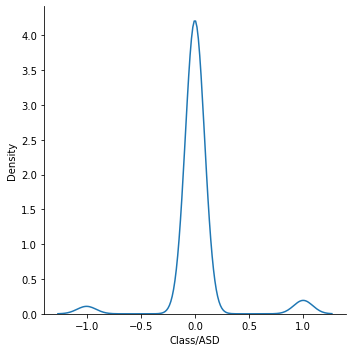

In [34]:
residuals=y_test-y_pred_model2 #residual pplot ffor the KNN classifier
sns.displot(residuals,kind="kde")

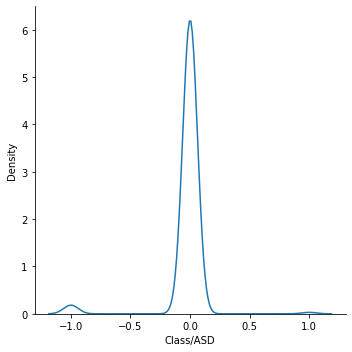

In [35]:
residuals=y_test-y_pred_model5 #residual pplot ffor the KNN classifier
sns.displot(residuals,kind="kde")

In [36]:
#on the basis of model evaluation we concluded that the we are getting the 100 % accuracy on both
# training and testing datasets therefore we are selecting that model

In [37]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'gender', 'jaundice', 'Family_mem_with_ASD', 'Class/ASD'],
      dtype='object')

In [38]:
df["gender"]

0       0
1       1
2       1
3       1
4       0
       ..
1049    0
1050    1
1051    1
1052    1
1053    1
Name: gender, Length: 1054, dtype: int64

In [39]:
x.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'gender', 'jaundice', 'Family_mem_with_ASD'],
      dtype='object')

### Creating the pickle file based on the final selected model:

In [40]:
import pickle
import json

In [41]:
with open("child_model.pkl","wb") as file:
    pickle.dump(model1,file)

In [42]:
project_data={"A1":{"yes":1,"no":0},
              "A2":{"yes":1,"no":0},
              "A3":{"yes":1,"no":0},
              "A4":{"yes":1,"no":0},
              "A5":{"yes":1,"no":0},
              "A6":{"yes":1,"no":0},
              "A7":{"yes":1,"no":0},
              "A8":{"yes":1,"no":0},
              "A9":{"yes":1,"no":0},
              "A10":{"yes":1,"no":0},
              "gender":{"male":1,"female":0},
              "jaundice":{"yes":1,"no":0},
              "Family_mem_with_ASD":{"yes":1,"no":0},
              "columns":list(x.columns)}
project_data

{'A1': {'yes': 1, 'no': 0},
 'A2': {'yes': 1, 'no': 0},
 'A3': {'yes': 1, 'no': 0},
 'A4': {'yes': 1, 'no': 0},
 'A5': {'yes': 1, 'no': 0},
 'A6': {'yes': 1, 'no': 0},
 'A7': {'yes': 1, 'no': 0},
 'A8': {'yes': 1, 'no': 0},
 'A9': {'yes': 1, 'no': 0},
 'A10': {'yes': 1, 'no': 0},
 'gender': {'male': 1, 'female': 0},
 'jaundice': {'yes': 1, 'no': 0},
 'Family_mem_with_ASD': {'yes': 1, 'no': 0},
 'columns': ['A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'A10',
  'Age_Mons',
  'gender',
  'jaundice',
  'Family_mem_with_ASD']}

In [43]:
with open("project_data.json","w") as file:
    json.dump(project_data,file)

In [44]:
df["Class/ASD"].value_counts()

1    728
0    326
Name: Class/ASD, dtype: int64

In [45]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,gender,jaundice,Family_mem_with_ASD,Class/ASD
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,1,0
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,0,1
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,0,1
1052,1,0,0,0,0,0,0,1,0,1,19,1,0,1,0
1053,1,1,0,0,1,1,0,1,1,0,24,1,1,1,1


In [49]:
model1.predict(pd.DataFrame([[1,1,0,0,0,1,1,0,0
              ,0,36,1,1,0]]))

array([1], dtype=int64)

In [47]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,gender,jaundice,Family_mem_with_ASD,Class/ASD
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,1,0
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,0,1
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,0,1
1052,1,0,0,0,0,0,0,1,0,1,19,1,0,1,0
